In [2]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

## Import all accepted submissions for a specifc course

In [3]:
#subs = import_submissions(course_id = "C00199", dbname="test1")
subs = import_all_submissions()

In [4]:
subs = subs[subs.veredict == 'AC']
subs.describe()

,submission_uid,user_id,problem_id,submission_id,state,time_out,time_in,veredict,score
count,608361,608361,608361,608361,608361,608361,608361,608361,1631
unique,608361,7257,1142,71,1,588416,585836,1,5
top,S001589741,U11585,P56118,S001,done,2010-10-27 18:06:53,2006-09-20 08:55:47,AC,100/100
freq,1,1182,11307,269408,608361,7,8,608361,1612
first,NaN,NaN,NaN,NaN,NaN,2010-07-12 11:07:35,2006-09-09 14:11:05,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-02-24 09:24:20,2016-02-24 09:24:09,NaN,NaN


In [5]:
subs = subs.sort_values(by='time_out')

## Generate each users sequence

In [6]:
# Users list
users = subs.user_id.unique()
print "%d Users" % len(users)

7257 Users


In [56]:
# Users pbls
pbls = subs.problem_id.unique()
print "%d resolved problems" % len(pbls)

1142 resolved problems


In [8]:
# Longuest sequence
seqsize = subs.user_id.value_counts(normalize=False)[0]
print ("the longuest sequence is %d accepted submissions long" % seqsize )

the longuest sequence is 1182 accepted submissions long


In [9]:
sequences = pd.DataFrame(index=range(seqsize), columns=users)

In [76]:
df = pd.DataFrame()
for u in users[0:500]:
    x = subs[subs.user_id == u].problem_id.values 
    x = x.tolist() + ([0 for i in range(len(pbls) - len(x))])
    df[u] = pd.Series(x)

In [70]:
len(pbls)
x = subs[subs.user_id == "U00052"].problem_id.values 
x = x.tolist() + ([0 for i in range(len(pbls) - len(x))])
len(x)

1142

### What is the max number of submissions for user ?

In [54]:
subs[['user_id', "problem_id"]].describe()

,user_id,problem_id
count,608361,608361
unique,7257,1142
top,U11585,P56118
freq,1182,11307


In [57]:
len(pbls)

1142

## Analyse a typical sequence

## sequence size vs number of users

In [77]:
#df

In [78]:
len(df.columns)

500

In [79]:
b = df.T.describe().T

In [80]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
b.to_csv('%s_whole_describe_for_%d_users.csv' % (timestr, len(df.columns)))

<IPython.core.display.Javascript object>


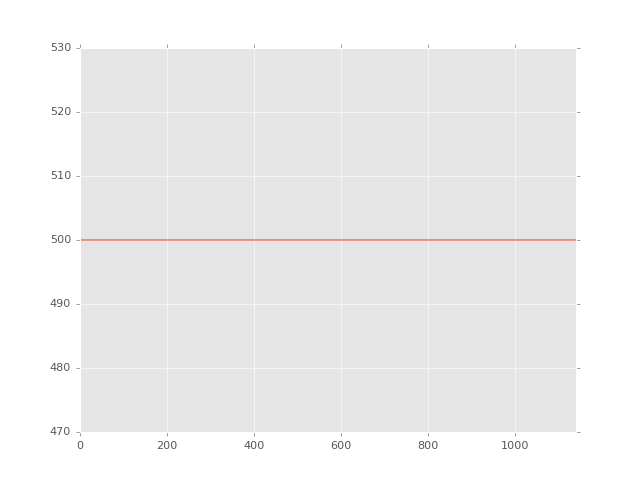

In [81]:
plt.figure()
df.T.describe().T["count"].plot()

## How many differents for each level ?

<IPython.core.display.Javascript object>


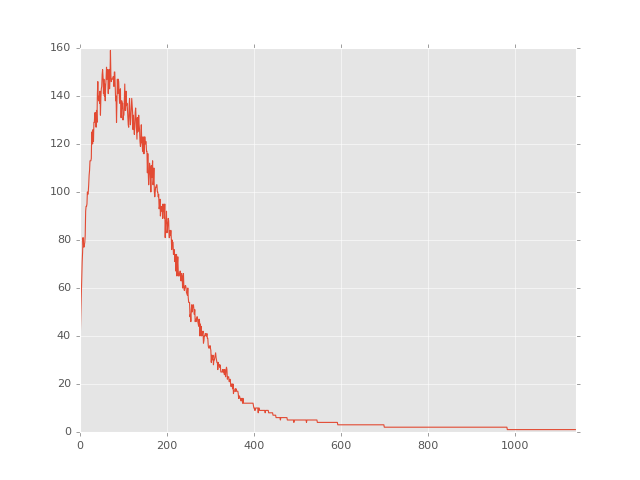

In [82]:
plt.figure()
df.T.describe().T["unique"].plot()

## How many differents for each level ? --> unique/total correlation 

In [280]:
# df.T.describe().T

<IPython.core.display.Javascript object>


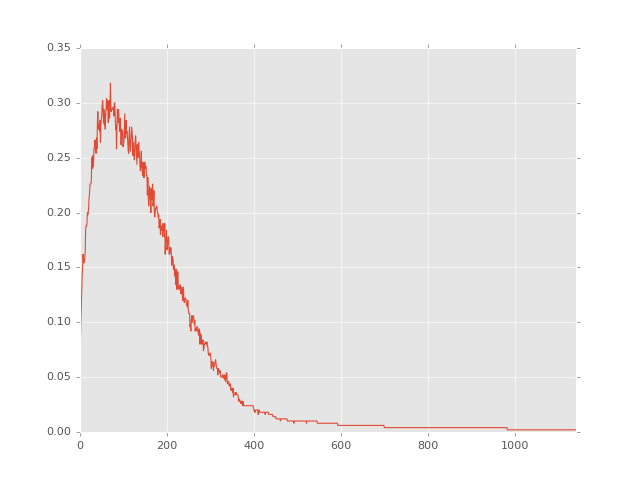

In [83]:
plt.figure()
(df.T.describe().T["unique"] / df.T.describe().T["count"]).plot()

## Let's iterate for the whole process

In [87]:
steps = []
pbls = []
for i in df.T:
    p = df.T[i].value_counts()
    pbls.append(p.index[0])
    s = p.sum()
    steps.append(p.apply(lambda x : float(x) / s))
    

In [88]:
df2 = pd.DataFrame(steps)

## Typical evolution

In [89]:
#df2.T[0]

### Typical evolution confidence

<IPython.core.display.Javascript object>


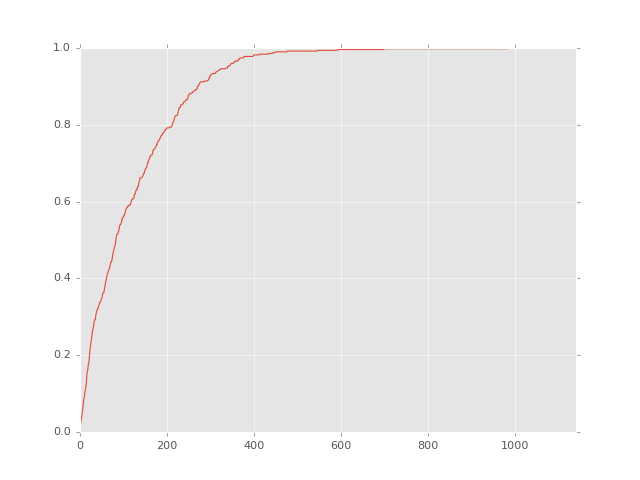

In [90]:
plt.figure()
evol = pd.Series([s[0] for s in steps])
evol.plot()

<IPython.core.display.Javascript object>


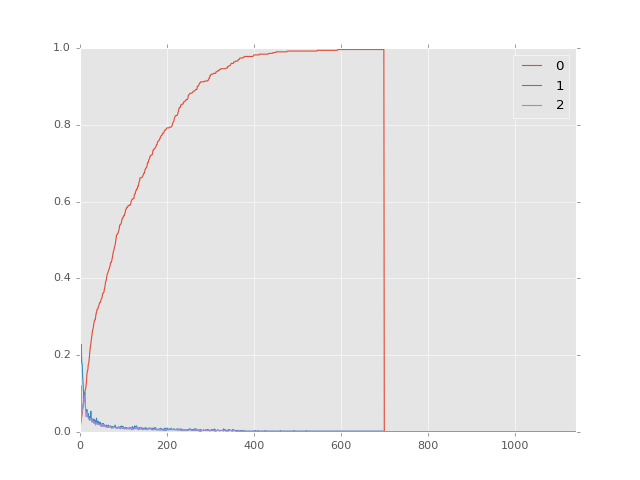

In [91]:
posi = 0
posj = 3

evol = pd.DataFrame([[s[i] if len(s) > posj-1 else 0 for s in steps] for i in range(posi, posj)], 
                    index=range(posi, posj))
evol.T.plot()